# Spécification , mise au point et complexité 


Notions Introduites : 

    1) Spécification
    2) Programmation défensive
    3) Tests et mise au point 
    4) Terminaison  : variant de boucle
    5) Correction : Invariant de boucle
    6) Complexité
    7) Exercices
    
Comment gagner en précision lors de l'écriture d'un programme ou d'un algorithme ?
Plusieurs axes de travail peuvent permettre de répondre à cette question.

La <b>spécification</b> permet de documenter les programmes et automatiser certains tests.

La <b>programmation défensive</b> a pour objectif d'anticiper toutes les sources d'erreur dans la conception même du programme.

Concevoir des tests suffisamment variés et même automatisés pour repérer les éventuelles erreurs de programmation.

La <b>correction</b> permet d'un point de vue théorique de savoir si le programme fait bien ce à quoi on s'attend (en particulier dans le cas de boucles)

La <b>terminaison</b> a pour objectif de déterminer si le programme va bien s'arrêter . 

Enfin l'étude de la <b>complexité</b> permet de donner un ordre d'idée du nombre d'opérations nécessaires pour la réalisation du programme.



## 1) Spécifications et commentaires.

###  Spécifications
Considérons le programme Python suitant  :



In [20]:
def indice_maximum_liste(L) :
    m=0
    for i in range(len(L)):
        if L[i]>L[m] :
            m=i
    return m

indice_maximum_liste([])

0

Il s'agit de savoir si ce programme est valide pour toutes les sortes de liste .

A faire : Tester le programme pour des listes qui ne donneront pas le résultat attendu .

In [21]:
# réponse : 
L=[]
L2=[3,'a']
indice_maximum_liste(L2)

TypeError: '>' not supported between instances of 'str' and 'int'

Afin d'éviter ce genre de désagrément, la première solution est de commenter ou de spécifier la fonction :

Solution 1 : Commentaires 

A faire : reprenez ce programme en ajoutant des commentaires précisant le domaine d'application de la liste :


In [0]:
# réponse : 

# fonction qui prend une liste non vide d'entiers 
def indice_maximum_liste(L) :
    m=0
    for i in range(len(L)):
        if L[i]>L[m] :
            m=i
    return m

Le commentaire apporté permettra à l'utilisateur du programme de connaître le domaine d'application de cette fonction.
Par contre, si la fonction est importée depuis un autre programme, l'utilisateur n'aura pas accès à ce commentaire . Il faut donc trouver une autre méthode pour transmettre ces informations.

Il est possible sous Python d'ajouter ces informations sous la forme de doctring . Elles seront alors disponibles par la commande **help** de Python .
Les docstring sont placés au début de la fonction et peut contenir plusieurs lignes. La commande help prend en variable le nom de la fonction:  `help(ma_fonction)`

Dans les docstring, on indiquera: 
- Les postconditions : ce que doit renvoyer la fonction
- Les préconditions : ce que la fonction prendra en entrée .


**A faire** : Ajouter les docstring et tester la fonction help sur la fonction maximum_liste





In [6]:
# réponse : 

def indice_maximum_liste(L) :
    """Postconditions : Renvoie l'indice du maximum du tableau
    Précondition : La liste L est une liste non vide d'entiers """
    m=0
    for i in range(len(L)):
        if L[i]>L[m] :
            m=i
    return m
help(indice_maximum_liste)


Help on function indice_maximum_liste in module __main__:

indice_maximum_liste(L)
    Postconditions : Renvoie l'indice du maximum du tableau
    Précondition : La liste L est une  liste non vide d'entiers



Comme vous le voyez, les informations sont accessibles par la commande help, mais rien n'enpêche le programmeur qui utilise cette fonction d'exécuter cette fonction avec une liste vide .

### Le bon usage des commentaires 

Afin de rendre compréhensible le programme par un autre utilisateur ou soi-même, il est conseillé d'ajouter des commentaire au cours du programme. Il ne faut toutefois pas surchager le programme : 

Exemple : 

`x=x+1 # incrémenter` : ici le commentaire est superflux . 

On préferera choisir un nom de variable plus parlant  : 

`compteur_indice =compteur_indice +1`

De manière générale, les programmeurs ont coutume de dire qu' "un bon programme se suffit à lui-même".

Il reste cependant des situations où les commentaire sont les bienvenus car ils expliquent quelque chose qui ne se déduit pas immédiatement de la lecture du code. En voici un exemple : 

n = 25 # le nombre de nombre premiers plus petit que 100

## 2) Programmation défensive

Malgré toute la bonne volonté du programmeur qui a pu prendre soin de spécifier les fonctions développées, l'utilisateur, qui ne les consulte pas, pourra aboutir à des erreurs.
Afin d'éviter les erreurs , il existe plusieurs méthodes : 

### a) Fonction exit

A l'aide de la fonction exit de la librairie system , on peut stopper le programme au moment souhaité.

**A faire**  : Compléter la fonction indice_maximum_liste afin qu'elle s'arrête lorsque l'utilisateur lance la fonction avec une liste vide. Vous pouvez consulter la documentation suivante : https://docs.python.org/2/library/sys.html .

In [7]:
# réponse : 


import sys   
def indice_maximum_liste(L) :
    """Postconditions : Renvoie l'indice du maximum du tableau
    Précondition : La liste L est une  liste non vide d'entiers """
    if len(L)==0:
        sys.exit(" La liste ne doit pas être vide")
   
    for i in range(len(L)):
        if L[i]>L[m] :
            m=i
    return m

indice_maximum_liste([])

SystemExit:  La liste ne doit pas être vide

C:\Users\dewim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Le problème de la fonction exit est qu'elle arrête l'ensemble du programme python . Il peut alors être intéressant d'ajouter le nom de la fonction suivi du commentaire en argument de la fonction exit.

Il existe une fonction dédiée pour cela : La fonction assert .

### b) Fonction assert

La fonction assert de Python combine le test d'une condition et l'interruption du programme avec un message d'erreur au cas où la condition n'est pas vérifiée.

assert condition , "messsage en cas d'erreur"

**A faire**  : Modifier la fonction maximum_liste afin qu'elle s'arrêtre losque l'utilisateur lance la fonction avec une liste vide.

In [22]:
# Réponse : 
def indice_maximum_liste(L) :
    """Postconditions : Renvoie l'indice du maximum du tableau
    Précondition : La liste L est une  liste non vide d'entiers """
    assert len(L)>0 , " La liste ne doit pas être vide"
    m=0
   
    for i in range(len(L)):
        if L[i]>L[m] :
            m=i
    return m

indice_maximum_liste([])

AssertionError:  La liste ne doit pas être vide

Comme vous pouvez le constater en testant la fonction avec une liste vide, nous obtenons des informations plus précises sur l'erreur commise.

**A faire**  : Modifier la fonction indice_maximum_liste afin qu'elle s'arrête lorsque l'utilisateur lance la fonction avec une liste contenant des éléments qui ne sont pas des entiers.

In [0]:
# Réponse : 

def est_une_liste_d_entiers(L):
    res=True
    for elt in L :
        if type(elt)!=int :
            res=False
    return res


def indice_maximum_liste(L) :
    """Postconditions : Renvoie l'indice du maximum du tableau
    Précondition : La liste L est une  liste non vide d'entiers """
    
    assert len(L)!=0, " La liste ne doit pas être vide"
    assert est_une_liste_d_entiers(L), " La liste n'est pas une liste d'entiers"
    m=0
   
    for i in range(len(L)):
        if L[i]>L[m] :
            m=i
    return m
est_une_liste_d_entiers([3,"R",5])


False

## 3) Test et mise au point

Même si on a correctement spécifié et documenté une fonction, il reste possible de faire une erreur en écrivant son code. Pour détecter ces éventuelles erreurs, on peut utiliser la fonction sur quelques cas concrets et vérifier qu'elle produit effectivement les résultats attendus. 

Par exemple, on peut tester que la fonction indice_maximum_liste renvoie bien 1 pour la liste [2,3,1]. 



**A faire**  : Modifier la fonction indice_maximum_liste en ajoutant plusieurs assert contenant les différents tests comme par exemple : 

assert indice_maximum_liste([1,3,8,5])==2

Si l'un de ces tests échoue, il faut rectifier le programme. Une fois l'erreur corrigée, il convient de relancer tous les tests, y compris ceux qui avaient déjà été effectués avec succès. En effet, en corrigeant une erreur, on peut en introduire une autre.

In [2]:
# Réponse : 

def est_homogene(L,Type):
    homogene=True
    for elt in L :
        if type(elt)!=eval(Type) :
            homogene=False
    return homogene


def indice_maximum_liste(L) :
    """Postconditions : Renvoie l'indice du maximum du tableau
    Précondition : La liste L est une  liste non vide d'entiers """
    #Tests de préconditions 
    assert len(L), " La liste ne doit pas être vide"
    assert est_homogene(L,"int"), " La liste n'est pas une liste d'entiers"
    m=0
   
    for i in range(len(L)):
        if L[i]>L[m] :
            m=i
    return m

# Tests de postconditions
assert indice_maximum_liste([1,3,8,5])==2 , "indice_maximum_liste([1,3,8,5])différent de 2"
assert indice_maximum_liste([1,3,8,20])==3 , "indice_maximum_liste([1,3,8,20])différent de 3"
assert indice_maximum_liste([10,3,8,5])==0 , "indice_maximum_liste([10,3,8,5])différent de 0"
assert indice_maximum_liste([1])==0 , "indice_maximum_liste([1]) différent de 0"
assert indice_maximum_liste([-8,3,-2,0])==1 , "indice_maximum_liste([-8,3,-2,0]) différent de 1 "



**Remarque 1** : Pour compléter les tests, on peut concevoir un programme qui effectue des tests aléatoires. Ce type de programme nommé **Oracle** , est très intéressant mais pose le problème de l'exactitude de cet oracle.

**Remarque 2** :  Il est souvent pertinent de concevoir le jeu de tests en même temps que les spécifications du programme. Ce travail permet souvent de gagner en précision lors de l'écriture du programme. En entreprise, dans les équipes de développement, ce sont dans la mesure du possible, des personnes différentes qui conçoivent le programme et le jeux de tests.

**Remarque 3**  : Lorsqu'un programme ne fonctionne pas, il peut être stratégique d'ajouter des print qui permettent de préciser l'état des variables au moment de l'erreur.  D'autres outils permettent de repérer l'erreur comme l'explorateur de variable de spyder ou python tutor http://pythontutor.com/visualize.html#mode=edit .

**A faire**  :

On considère la fonction est-croissant(L) qui permet de déterminer si une liste est triée dans l'ordre croissant.

Définir les préconditions et les postconditions de cette fonction,
Définir un jeu de test pour cette fonction.
Corriger le programme de la fonction ci-dessous :

In [3]:
def est_croissant(L):

    '''
    Précondition : Liste non nulle d'au moins deux élémets  nombres entiers
    Postconditions  : retourne True si la liste est classée dans l'ordre croissant et False sinon
    '''
    assert est_homogene(L,"int") ," Attention : L n'est pas une liste d'entiers"
    assert L!=[] , " Attention , la liste est vide"
    
    i=len(L)-2
    res=True
    while i>=0 :
        if L[i] >= L[i+1] :
            res=False
        i=i-1
    return res

# Jeux de tests
assert est_croissant([2,4,5,7])==True , " Erreur"
assert est_croissant([2,4,15,7])==False , " Erreur"


# Exerc de la fonction
L=[1,3,5,20,40]       
est_croissant(L)   

True

## 4) Terminaison d'un algorithme  : variant de boucle 

On s’intéresse ici à la terminaison des boucles. Il n’y a pas de problème avec les boucles **for** dont le nombre d’itérations est connu à l’avance. Le problème apparait avec les boucles while pour lesquelles on ne sait pas a priori si la condition de terminaison sera vérifiée.

Exemple : 


In [4]:
def f(n):
#n un entier

    if not(type(n)==int and n>=0):
        return None

    compteur=2
    produit=1
    
    while n-compteur>=0:
        produit=produit*compteur
        compteur+=1
    
    return produit


In [5]:
f(-4)




1.  Le programme précédent se termine-t-il toujours, quelque soit l’entrée ?

Oui,

si on n’a pas un entier positif, on retourne none. 

si l’entier est inférieur à 1 on ne rentre pas dans la boucle while et s’il est plus grand que 2, on considère  **i=n−compteur**.

C’est un entier qui décroit strictement à chaque itération.

2.  Quel est son but ?

Son but est de calculer $n!=1\times2\times3....\times n$

------
**Définition : Terminaison  de  boucle** 

Un  moyen  usuel  de  démontrer  la  terminaison  d’une  boucle  est de trouver une quantité, fonction des paramètres de la boucle, qui est un **entier positif et qui décroit strictement à chaque itération**. Cette quantité est appelée **variant de boucle**.


------

**A faire :** Fonction puissance de 2

    1) A l'aide d'une boucle tant que,  créer un programme python qui pour tout entier positif ou nul, retourne 2 à la puissance n.
    2) Décrire les préconditions et les postconditions 
    3) Démontrer la terminaison de votre algorithme en mettant en évidence le variant de boucle.




In [6]:
# réponse 1-2
def deux_puissance(n):
    '''
    Préconditions : n est un entier positif ou nul
    Prosconditions : Fonction qui retourne 2 à la puissance de n
    
    '''
    assert type(n)==int , " Attention, n doit être un entier positif ou nul"
    p=1
    i=n 
    while i>0:
        p=p*2
        i=i-1
    return p
deux_puissance(0)

1

In [7]:
# réponse 1-2
def deux_puissance(n):
    '''
    Préconditions : n est un entier positif ou nul
    Prosconditions : Fonction qui retourne 2 à la puissance de n
    
    '''
    if n==0 :
      return 1
    
    p=2
    i=1
    while i!=n :
      p=p*2
      i=i+1
    return p

deux_puissance(3) 

8

**Réponse 3** :
Dans ce programme le variant de boucle est i

Au départ i vaut n qui est un entier positif ou nul 

D'autre part, à chaque itération, on retranche 1 à i donc i est décroissant  et i restera un entier.

i est donc un variant de boucle pour ce programme, ce qui prouve sa terminaison.

## 5) Correction partielle d’un algorithme : invariant de boucle

Une fois que l’on a démontré qu’un algorithme se termine effectivement, il serait agréable de savoir si celui-ci produit le résultat attendu. Par exemple une fonction qui se termine tout le temps pourrait être

In [8]:
def factorielle(n):
    return 1 # retourne n! , mais ne marche que pour 0 et 1

Cette fonction se termine tout le temps mais ... n’est pas très intéressante. Les instructions simples ne posent pas de problème. Les problèmes arrivent en général lorsque l’on a des boucles. Il faut alors se persuader de la logique sous-jacente du programme. Les variables du programme sont-elles correctement initialisées avant la boucle ? Le nombre de tours de boucle est-il le bon et, le cas échéant, l'indice de boucle est-il correct ? Les valeurs obtenues au final sont-elle les bonnes ? Toutes ces questions peuvent être abordées avec la notion d'invariant de boucle. 

------
**Définition : Invariant de boucle**

Pour démontrer qu’un algorithme produit le résultat attendu, on utilise un invariant de boucle, c’est-à-dire une propriété qui :
- est vérifiée avant d’entrer dans la boucle
- si cette propriété est vérifiée avant une itération, elle est vérifiée après celle-ci
- lorsqu’elle  est vérifiée  en  sortie de  boucle, elle permet (combinée  avec la condition  de sortie de boucle) d’en déduire que le programme produit le résultat attendu
------

**Exemple 1 :**
À titre d'exemple, nous allons démontrer à l'aide d'un invariant de boucle la correction du programme suivant (qui calcule la somme des puissances k-ièmes des p premiers entiers naturels) :

In [9]:
def S(p, k): # k !=0
    valeur_somme=0
    for i in range(1,p+1) :
        valeur_somme=valeur_somme+i**k 
    return valeur_somme

In [10]:
S(5, 2)

55

**Preuve de correction partielle**

Nous étudions la propriété suivante (qui est notre invariant de boucle) : après n itérations de cette boucle, on a :
$$ p_{n} \: : \: valeur\_somme(n) \: = \:\sum_{i=0}^{i=n} i^{k} $$

1.La propriété $p_0$ est bien vérifiée avant l'entrée de la boucle : valeur_somme = 0 par initialisation et on a bien

$$ \sum_{i=0}^{i=0} i^{k} \: = \: 0 $$

2.Supposons que la propriété $p_n$ soit vérifiée pour un certain n. On a alors avant la (n+1)-ème itération de cette boucle :

$$ p_{n} \: : \: valeur\_somme(n) \: = \:\sum_{i=0}^{i=n} i^{k} $$


Après la (n+1)-ème itération de cette boucle on a :

$$ valeur\_somme(n+1) \: = valeur\_somme(n) \: + \: (n+1)^{k} \: = \:\sum_{i=0}^{i=n} i^{k} \: + \: (n+1)^{k}\: = \sum_{i=0}^{i=n+1} i^{k} \:$$

donc $p_{n+1}$ est bien vérifiée.

Moyennant le principe du raisonnement par récurrrence la propriété $p_n$ est bien vérifiée pour tout entier *n* naturel donc le calcul est exact ce qui achève la preuve de correction partielle.

**Exemple 2 :**

On considère la fonction suivante qui calcule le quotient et le reste de la division euclidienne de a par b par la méthode des soustractions successives. Cette méthode, peu efficace, a été présentée par Euclide dans ses ouvrage ELEMENTS.

In [11]:
def division_euclidienne(a,b):
    q=0
    r=a
    while r>=b:
        q=q+1
        r=r-b
    return q,r



On suppose que $a \ge 0$ et $b>0$ et on cherche à démontrer que cette fonction renvoie bien une paire d'entiers  q et r tels que : 

$$a=q \times b+r$$
$$0 \le r<b$$
ce qui est la définition de la division euclidienne.

**A faire :** Effectuer la preuve de correction partielle  

**Réponse : Preuve de correction partielle**

Nous étudions la propriété suivante (qui est notre invariant de boucle) : après n itérations de cette boucle, on a :
$$ r \ge 0 $$
$$ a= q\times b+r$$


1. Initialisation : 
Avant le début de la boucle, $q \times b+r= r=a$ et $r=a\ge 0$ .

L'invariant de boucle est donc vérifié avant le début de la boucle

2. Hérédité : 
Supposons que l'invariant de boucle est vérifié à la fin d'une itération et  montrons qu'il est aussi vérifié à l'issue de l'itération suivante.

On suppose que 
$$ r \ge 0 $$
$$ a= q\times b+r$$

On sait que  r>=b  
q'=q+1 et r'=r-b

D'une part,  r-b>=0  ainsi r>=0
D'autre part, (q+1)*b +r-b = q*b+r +b-b = q*b+r = a

L'invariant de boucle est toujours vrai à l'issue de la boucle.

3. Conclusion 

A chaque itération,  l'invariant de boucle est vérifié et le programme se termine lorsque r< b , ce qui correspond à l'objectif du programme.

## 6) Complexité 

Nous avons maintenant un algorithme qui produit le résultat demandé et qui se termine.... un jour. Mais si un algorithme se termine dans 10000 ans, il est correct mais peu intéressant. On va maintenant s'intéresser à la durée d'exécution du programme ou plus précisément à **"comment la durée d'execution augmente lorsque la taille des données augmente"** .

Plusieurs problèmes se posent. En fait, le temps d'execution dépend de beaucoup de choses :
- Le langage dans lequel l'algorithme est implémenté.
- Le processeur et en particulier la fréquence du processeur ainsi que la mémoire cache.
- Si d'autres programmes s'exécutent en même temps

On va donc essayer de caractériser l'efficacité de l'algorithme indépendamment de son implémentation en comptant le nombre d'opérations élémentaires nécessaires à son exécution. On évitera donc d'utiliser certaines fonctions de python qui peuvent utiliser un nombre important d'opération (tri de liste par exemple) .

Les opérations de base sur lesquelles nous nous appuyerons sont les suivantes : 
- addition, soustraction, multiplication ...
- affectation, accès à un élément d'un tableau...
- tests simples ( <;>;==...)




Ces opérations de base ont normalement un faible temps d'execution (quelques cycles d'horloge du processeur). Nous allons faire comme si elles avaient le même temps et ce sera notre unité de base. On s'intéresse ensuite au comportement asymptotique lorsque la taille des données traitées devient grande. Si l'on note $n$ la taille des données et que le nombre d'opérations de base exécutées par l'algorithme est $3n^2+2n+20$ , alors : 
- seul le terme du plus grand ordre $3n^2$ est réellement significatif et traduit le temps que mettra l'algorithme à s'exécuter lorsque les données sont très importantes.
- Le préfacteur $3$ devant $n^2$ n'est pas très intéressant. Lorsque n tend vers l'infini , entre $3$ et $n^2$, c'est $n^2$ qui domine.
- On se limite donc à dire que l'algorithme a un temps d'execution qui croit de la même façon que $n^2$ et on parle de complexité en temps.

**Définition :** 
Pour comparer des algorithmes, il n'est pas nécessaire d'utiliser la fonction T, mais seulement l'ordre de grandeur asymptotique, noté O ("grand O").

T(n) est en O(f(n)) s’il existe un seuil $n_0$ à partir duquel la fonction T est toujours dominée par la fonction f, à une constante multiplicative fixée c près .



|   Complexité  ( O)                    | Type de complexité     |
| ---- | ---- |
|  $O(1)$    |   constante   |
|  $O(log(n))$     | logarithmique    |
|  $O(n)$     | linéaire     |
|  $O(nlog(n))$     |quasi-linéaire   |
|   $O(n^2)$    | quadratique  |
|   $O(n^3)$    | cubique  |
|   $O(2^n)$    | exponentielle  |
|   $O(n!)$    | factorielle  |

Ces différentes complexités seront abordées au cours de l'année.


**Exemples :**

- $T1(n)=7=O(1)$  
- $T2(n)=12n+5=O(n)$
- $T3(n)=4n^2+2n+6=O(n^2)$
- $T4(n)=0.4*2^n+1000000000 \times{n^{100}}=O(2^n)$





En toute rigueur, on peut en effet distinguer deux formes de complexité en temps :

    la complexité dans le meilleur des cas : c'est la situation la plus favorable,
    par exemple : recherche d'un élément situé à la première position d'une liste
    la complexité dans le pire des cas : c'est la situation la plus défavorable,
    par exemple : recherche d'un élément dans une liste alors qu'il n'y figure pas

On calculera le plus souvent la complexité dans le pire des cas, car elle est la plus pertinente. Il vaut mieux en effet toujours envisager le pire.






**Application :**
Etude de la complexité de la fonction suivante 

In [12]:
def division_euclidienne(a,b):
    q=0
    r=a
    while r>=b:
        q=q+1
        r=r-b
    return q,r


**Réponse :**
Le programme effectue le plus grand nombre d'opérations lorsque b=1.
Ici n correspond au nombre a.

On effectue donc la division de n par 1.




Début du programme :
affectation : 1
affectation : 1

Itérations : au plus n

- comparaison : 1
- addition + affectation : 2
- soustraction + affectation : 2
   
$T(n) = 2+ (n)*(5) = 2 + 5n = 5n+2 = O(n)$


Illustration : 
La fonction timeit de python permet de donner une estimation du temps nécessaire à l'exécution d'un programme.



**Expérimentation de la complexité**

Afin d'expérimenter la complexité en temps, on peut utiliser le module timeit qui mesure le temps nécessaire à l'exécution d'un programme. Afin de gagner en précision, il lance le programme plusieurs fois et effectue une moyenne des temps d'execution.

Méthode 1 :

%timeit   factorielle(100)

Méthode 2 : 
import timeit
timeit.timeit('output = factorielle(10)', "from __main__ import factorielle",number=2)

**A faire :**

Utiliser la fonction Timeit pour créer un graphique permettant de visualiser le temps d'execution en fonction de n pour le calcul de n!.
On partira d'une liste de valeur de n  : N=[3,10,20,100,200,300] et on construira ensuite la liste des temps associés avant d'effectuer l'affichage.

In [13]:
%timeit  division_euclidienne(100,1)


12.9 µs ± 556 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [14]:
# réponse 
import timeit

N=[3,10,20,100,200,300]
Times=[]
for n in N:
    
    t=timeit.timeit('output = division_euclidienne('+str(n)+',1)', "from __main__ import division_euclidienne", number=1000000)
    Times.append(t)
print(Times)



[0.7230150999999978, 1.6090333000000214, 2.761835899999994, 12.843905399999983, 26.069153200000017, 41.15857470000003]


In [15]:
%timeit division_euclidienne(100,1)

13.4 µs ± 612 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
# Import de la librairie graphique
import matplotlib.pyplot as plt
def affichage(X,Y,LabelX,LabelY,Titre):
    figure = plt.figure()
    plt.ylabel(LabelY)
    plt.xlabel(LabelX)
    plt.plot(X,Y,'grey') # affiche les traits entre les points
    plt.title(Titre)

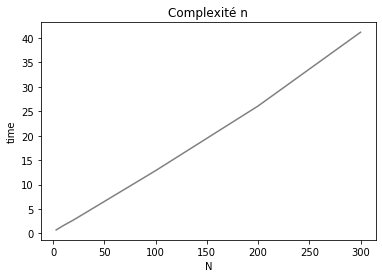

In [17]:
affichage(N,Times,'N', 'time', 'Complexité n')

## 7) Exercices 


### Exercice 1

1. Construire la fonction somme des éléments d'une liste 
2. Préciser la chaine de spécification, les commentaires et les assert nécessaires
3. Démontrer la terminaison 
4. Démontrer la correction partielle 
5. Calculer la complexité de cette fonction.

In [18]:
# 1-2  Programme 

def somme(L):
    '''
    precondition : Les éléments de la liste non vide dont tous les éléments sont de type int ou float
    postcondition : Retourne la somme de tous les éléments de la liste 
    '''
    assert type(L)==list, " L doit être une liste"
    assert L!=[], "La liste ne doit pas être vide"
    assert est_homogene(L,"int") or est_homogene(L,"float") ,"La liste doit être une liste d'entiers ou de réels"
    
    
    res=0
    for i in range(len(L)):
        res=res+L[i]
    return res

# tests de vérifications
assert somme([2,3])==5
assert somme([3.5,3.5])==7.0
assert somme([4])==4

##### 3) Terminaison
 
 On prend pour variant de boucle : variant= len(L)-i 
 $$0 \le i \le len(L)-1$$
 $$0 \ge -i \ge -(len(L)-1)$$
 $$len(L) \ge len(L)-i \ge len(L)-(len(L)-1)$$
 $$1 \le variant \le len(L)$$ 
 
 
d'autre part, len(L)-i  est un entier décroissant puisque len(L) est un entier et i est un entier croissant.

Conclusion : len(L)-i  est un entier positif et décroissant . Il s'agit donc d'un variant de boucle , ce qui prove la terminaison du programme.

##### 4) Correction partielle

Nous étudions la propriété suivante (qui est notre invariant de boucle) : après n itérations de cette boucle, on a :
$$ p_{n} \: : \: res\: = \:\sum_{i=0}^{i=n} L[i] $$

1.La propriété $p_0$ est bien vérifiée avant l'entrée de la boucle : res=0 par initialisation et on a bien


2.Supposons que la propriété $p_n$ soit vérifiée pour un certain n. On a alors avant la (n+1)-ème itération de cette boucle :

$$ p_{n} \: : \: valeur\_somme(n) \: = \:\sum_{i=0}^{i=n} L[i] $$


Après la (n+1)-ème itération de cette boucle on a :

$$ res = res \: + \: L[n+1] \: = \:\sum_{i=0}^{i=n} L[i] + \: L[n+1] =\:\sum_{i=0}^{i=n+1} L[i] \: $$
donc $p_{n+1}$ est bien vérifiée.

Moyennant le principe du raisonnement par récurrrence la propriété $p_n$ est bien vérifiée pour tout entier *n* naturel donc le calcul est exact ce qui achève la preuve de correction partielle.


##### 5) Complexité pour une liste de taille n 

Début du programme : 

    affectation : 1
    Calcule de len(L) : 
        Affectation 1
        addition + affectation : n 
Pour n itération : 

    addition + affectation : 2
    
    
$T(n)= 1+n+n(2) = 3n+1 => O(n) $ 
Le coût de ce programme est donc linéaire 


    

### Exercice 2

1. Construire la fonction qui teste l'appartenance d'une valeur à une liste
2. Préciser la chaine de spécification, les commentaires et les assert nécessaires
3. Démontrer la terminaison 
4. Démontrer la correction partielle 
5. Calculer la complexité de cette fonction.


In [19]:
# 1-2  Programme 

def appartient(elt,L):
    '''
    precondition : L est une liste non vide et elt une variable de type quelconque.
    postcondition : Retourne un Booleen ( True le elt est un élément de la liste)
    '''
    assert type(L)==list, " L doit être une liste"
    assert L!=[], "La liste ne doit pas être vide"
    
    res=False
    for i in range(len(L)):
      if L[i] == elt : 
        res=True
    return res

# tests de vérifications
assert appartient(3,[2,1,3])==True
assert appartient(3,[2,1,5])==False
assert appartient(3,[3])==True

##### 3) Terminaison

Candidat de variant de boucle : v=len(L)-i

i est un entier strictement croissant de 0 à len(L)-1. Ainsi v est un entier positif ou nul strictement décrroissant.

v est donc un variant de boucle ce qui prouve la terminaison du programme.

##### 4) Correction

Proposition d'invariant de boucle :<br>
à l'issue de l'itération de rang i , res = True<br>
si elt apparait dans les i+1 premiers éléments. res = False sinon

Démonstration :

Initialisation

Avant le début de la boucle, res = False, ce qui est correct puisque elt ne peut appartenir à une liste vide.

Hérédité :

Supposons que la propriété est vraie au rang i. <br>
Si res = False et que L[i+1]=elt alors à l'issue de l'itération i+1, res= True<br> 
Si res = False et que L[i+1]!=elt , alors à l'issue de l'itération i+1, res = False <br>
Si res= True, alors à l'issue de l'itération i+1, res=True

Conclusion A chaque itération, la propriété est vérifiée.

La propriété est donc un invariant de boucle, ce qui prouve la correction partielle du programme.

##### 5) Complexité

Début du programme:

    2 comparaisons et 1 affectation

Itérations ( n)

    1 comparaison et 1 affectation

T(n) = 3+2n => O(n)

Le programme est donc de complexité linéaire.


### Exercice 3

1. Construire la fonction factorielle de n ( n!) 
2. Préciser la chaine de spécification, les commentaires et les assert nécessaires
3. Démontrer la terminaison 
4. Démontrer la correction partielle 
5. Caluler la complexité de cette fonction.